# Datenanalyse mit pandas und seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

Einlesen einer CSV-Datei.

In [2]:
dat = pd.read_csv("Daten/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv", sep=",", decimal=".")
#help(pd.read_csv)

Verschaffen wir uns erst einmal einen Überblick über die ersten und letzten Zeilen der Tabelle.

In [3]:
dat.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


In [4]:
dat.tail(10)

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
1034,1909,White,Male,50.9,2363.8
1035,1908,White,Male,49.9,2412.3
1036,1907,White,Male,46.0,2637.0
1037,1906,White,Male,47.3,2529.3
1038,1905,White,Male,47.6,2544.7
1039,1904,White,Male,46.6,2630.5
1040,1903,White,Male,49.5,2494.2
1041,1902,White,Male,50.2,2430.1
1042,1901,White,Male,48.0,2582.3
1043,1900,White,Male,46.6,2613.2


Welche Spalten gibt es?

In [5]:
dat.columns

Index(['Year', 'Race', 'Sex', 'Average Life Expectancy (Years)',
       'Age-adjusted Death Rate'],
      dtype='object')

In [6]:
dat.describe()

,Year,Average Life Expectancy (Years),Age-adjusted Death Rate
count,1044.00000,1035.000000,1044.000000
mean,1957.50000,64.117295,1614.076820
std,33.50112,11.786490,678.013357
min,1900.00000,29.100000,616.700000
25%,1928.75000,56.600000,1040.250000
50%,1957.50000,66.600000,1541.400000
75%,1986.25000,73.600000,2073.025000
max,2015.00000,81.400000,3845.700000


In [7]:
#dat.mean()

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1044 non-null   int64  
 1   Race                             1044 non-null   object 
 2   Sex                              1044 non-null   object 
 3   Average Life Expectancy (Years)  1035 non-null   float64
 4   Age-adjusted Death Rate          1044 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 40.9+ KB


In [9]:
dat.groupby(["Race","Sex"]).describe()

Year                                              \
                      count    mean        std     min      25%     50%   
Race      Sex                                                             
All Races Both Sexes  116.0  1957.5  33.630343  1900.0  1928.75  1957.5   
          Female      116.0  1957.5  33.630343  1900.0  1928.75  1957.5   
          Male        116.0  1957.5  33.630343  1900.0  1928.75  1957.5   
Black     Both Sexes  116.0  1957.5  33.630343  1900.0  1928.75  1957.5   
          Female      116.0  1957.5  33.630343  1900.0  1928.75  1957.5   
          Male        116.0  1957.5  33.630343  1900.0  1928.75  1957.5   
White     Both Sexes  116.0  1957.5  33.630343  1900.0  1928.75  1957.5   
          Female      116.0  1957.5  33.630343  1900.0  1928.75  1957.5   
          Male        116.0  1957.5  33.630343  1900.0  1928.75  1957.5   

                                      Average Life Expectancy (Years)  \
                          75%     max                           count   
Race      Sex                                                           
All Races Both Sexes  1986.25  2015.0                           115.0   
          Female      1986.25  2015.0                           115.0   
          Male        1986.25  2015.0                           115.0   
Black     Both Sexes  1986.25  2015.0                           115.0   
          Female      1986.25  2015.0                           115.0   
          Male        1986.25  2015.0                           115.0   
White     Both Sexes  1986.25  2015.0                           115.0   
          Female      1986.25  2015.0                           115.0   
          Male        1986.25  2015.0                           115.0   

                                 ...              Age-adjusted Death Rate  \
                           mean  ...    75%   max                   count   
Race      Sex                    ...                                        
All Races Both Sexes  66.546957  ...  74.70  78.9                   116.0   
          Female      69.199130  ...  78.20  81.3                   116.0   
          Male        64.015652  ...  71.15  76.5                   116.0   
Black     Both Sexes  58.354783  ...  69.10  75.6                   116.0   
          Female      60.962609  ...  73.40  78.5                   116.0   
          Male        55.788696  ...  64.60  72.5                   116.0   
White     Both Sexes  67.340000  ...  75.35  79.1                   116.0   
          Female      70.044348  ...  78.75  81.4                   116.0   
          Male        64.803478  ...  71.85  76.7                   116.0   

                                                                          \
                             mean         std     min       25%      50%   
Race      Sex                                                              
All Races Both Sexes  1477.929310  553.975271   724.6   977.575  1336.45   
          Female      1305.069828  569.495503   616.7   777.975  1113.60   
          Male        1682.723276  520.252672   855.1  1258.625  1611.65   
Black     Both Sexes  1880.958621  780.511865   849.3  1246.425  1561.25   
          Female      1694.454310  822.298999   710.8   978.875  1336.20   
          Male        2112.931897  716.988939  1034.0  1626.825  1861.05   
White     Both Sexes  1446.911207  545.138269   725.4   951.400  1310.15   
          Female      1275.183621  559.600252   617.6   758.450  1085.85   
          Male        1650.529310  512.954612   853.4  1226.750  1587.25   

                                        
                           75%     max  
Race      Sex                           
All Races Both Sexes  1970.150  2541.6  
          Female      1870.450  2410.4  
          Male        2118.300  2740.5  
Black     Both Sexes  2549.125  3586.2  
          Female      2489.600  3362.4  
          Male        2690.825  3845.7  
White     Both Sexes  1917.575  2501.2

In [10]:
datGrouped = dat.groupby(["Race","Sex"])

('All Races', 'Both Sexes')
('All Races', 'Female')
('All Races', 'Male')
('Black', 'Both Sexes')
('Black', 'Female')
('Black', 'Male')
('White', 'Both Sexes')
('White', 'Female')
('White', 'Male')


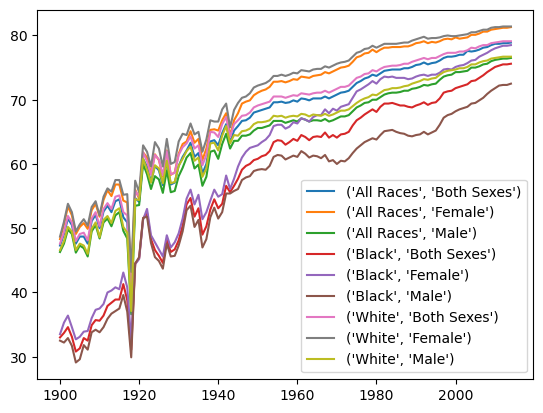

In [11]:
fig, ax = plt.subplots()
lbls = []
for groupname in datGrouped.groups:
    print(groupname)
    group = datGrouped.get_group(groupname)
    t = group["Year"]
    y = group["Average Life Expectancy (Years)"]
    lbls.append(groupname)
    ax.plot(t,y)
ax.legend(lbls)
plt.show()

## Beispiel: Städte der Welt

In [12]:
df_cities = pd.read_csv("Daten/world-cities.csv")

In [13]:
df_cities.head()
df_cities.describe()

,geonameid
count,2.301800e+04
mean,2.554269e+06
std,1.671581e+06
min,1.425600e+04
25%,1.265756e+06
50%,2.469263e+06
75%,3.460083e+06
max,1.105482e+07


Wieviele Städte in welchem Land?

In [14]:
df_cities["country"].value_counts()[:10]
#df_cities.country.value_counts()[:10]

country
United States    2699
India            2443
Brazil           1200
Russia           1093
Germany          1055
China             799
Japan             736
France            633
Italy             571
Spain             569
Name: count, dtype: int64

### Extrahiere deutsche Städte

In [15]:
cities_de = df_cities[df_cities["country"] == "Germany"]
cities_de.info()

#df_cities["country"] == "Germany"

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 4303 to 5357
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        1055 non-null   object
 1   country     1055 non-null   object
 2   subcountry  1055 non-null   object
 3   geonameid   1055 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 41.2+ KB


In [16]:
cities_de.head()

,name,country,subcountry,geonameid
4303,Zwickau,Germany,Saxony,2803560
4304,Zweibrücken,Germany,Rheinland-Pfalz,2803620
4305,Zulpich,Germany,North Rhine-Westphalia,2803723
4306,Zossen,Germany,Brandenburg,2803870
4307,Zittau,Germany,Saxony,2804008


### Städte nach Bundesländern

In [17]:
cities_by_state = cities_de["subcountry"].value_counts()

In [18]:
%matplotlib inline
cities_by_state.plot(kind="pie")

<Axes: ylabel='count'>